In [11]:
# Import dependencies
import numpy as np
import pandas as pd

# Import Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import extract

In [12]:
# Create engine
engine = create_engine("sqlite:///hawaii.sqlite")

# Reflect existing database into new model
Base = automap_base()

# Reflect tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create session (link) from Python to DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [14]:
# Filter Measurement table to retrieve temperatures for June
june_temps = session.query(Measurement.tobs).\
        filter(func.strftime("%m", Measurement.date) == "06").all()

print(june_temps)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [15]:
# Create DF from list of temperatures for June
june_temps_df = pd.DataFrame(june_temps, columns = ["June_Temps"])
june_temps_df.head()

,June_Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [16]:
# Calculate summary statistics for June temperature DF
june_temps_df.describe()

,June_Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [17]:
# Filter Measurement table to retrieve temperatures for December
dec_temps = session.query(Measurement.tobs).\
        filter(func.strftime("%m", Measurement.date) == "12").all()

print(dec_temps)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [18]:
# Create DF from list of temperatures for December
dec_temps_df = pd.DataFrame(dec_temps, columns = ["December_Temps"])
dec_temps_df.head()

,December_Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [19]:
# Calculate summary statistics for December temperature DF
dec_temps_df.describe()

,December_Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional Queries

In [21]:
# Filter Measurement table to retrieve precipitation data for June
june_prcp = session.query(Measurement.prcp).\
        filter(func.strftime("%m", Measurement.date) == "06").all()

print(june_prcp)

[(0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.07,), (0.0,), (0.56,), (0.89,), (0.0,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.05,), (0.06,), (0.07,), (None,), (0.0,), (0.0,), (0.01,), (0.01,), (0.0,), (0.02,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.15,), (0.01,), (0.0,), (0.05,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.37,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.04,), (0.12,), (0.04,), (0.02,), (0.35,), (0.03,), (0.01,), (0.0,), (0.0,), (0.03,), (0.01,), (0.0,), (0.66,), (0.01,), (0.0,), (0.0

In [24]:
# Create DF from list of precipitation data for June
june_prcp_df = pd.DataFrame(june_prcp, columns = ["June_Precipitation"])
june_prcp_df.head()

,June_Precipitation
0,0.00
1,0.01
2,0.00
3,0.00
4,0.00


In [25]:
# Calculate summary statistics for June precipitation DF
june_prcp_df.describe()

,June_Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


<AxesSubplot:>

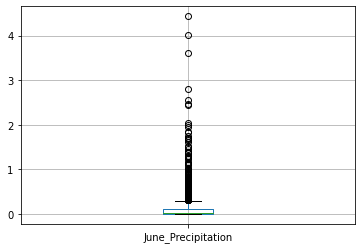

In [32]:
# Visualize June precipitation outliers with box and whiskers plot
june_prcp_df.boxplot()

In [27]:
# Filter Measurement table to retrieve precipitation data for December
dec_prcp = session.query(Measurement.prcp).\
        filter(func.strftime("%m", Measurement.date) == "12").all()

print(dec_prcp)

[(0.04,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (1.58,), (0.77,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (1.4,), (0.0,), (0.0,), (None,), (0.13,), (0.55,), (0.06,), (0.01,), (0.0,), (0.03,), (0.08,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.13,), (0.07,), (0.07,), (0.08,), (0.4,), (0.7,), (0.0,), (0.01,), (0.07,), (0.02,), (0.15,), (0.02,), (0.18,), (0.03,), (0.04,), (0.1,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.01,), (0.0,), (0.0,), (0.0,), (0.2,), (0.01,), (None,), (None,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.14,), (0.09,), (0.01,), (0.02,), (0.02,), (0.12,), (0.0,), (0.1,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.0,), (0.0,), (0.0,), (0.0,), (0.04,), (0.0,), (2.01,), (0.01,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.03,), (0.0,), (0.0,), (0.02,), (0.0,), (0.0,), (1.1,), (0.02,), (0.0,), (0.16,), (0.09,), (0.02,), (0.0,), (0.0,), (0.05,), (0.02,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.0,), (0.02,), (

In [28]:
# Create DF from list of precipitation data for December
dec_prcp_df = pd.DataFrame(dec_prcp, columns = ["December_Precipitation"])
dec_prcp_df.head()

,December_Precipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00


In [29]:
# Calculate summary statistics for December precipitation DF
dec_prcp_df.describe()

,December_Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


<AxesSubplot:>

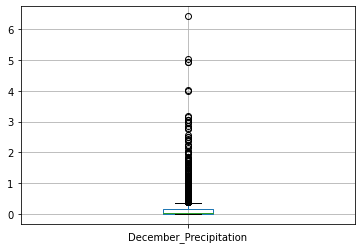

In [33]:
# Visualize December precipitation outliers with box and whiskers plot
dec_prcp_df.boxplot()